In [2]:
import sys
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

In [3]:
# ## PLOT configs
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 17,                   # Set font size to 11pt
    'axes.labelsize': 25,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Synthetic dataset

## ||Thetahat -thetastar|| distance

In [4]:
df = pd.read_pickle("lambda-var-synth-tstar.pkl")

In [5]:
pd.DataFrame([df['lamb'][8:], df['t1_thetadiff_oa_mean'][8:]])

,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
lamb,0.400000,0.500000,0.600000,0.700000,0.80000,0.900000,1.000000,1.500000,2.000000,2.500000,3.000000,4.000000,5.000000,7.00000,10.000000,15.000000,20.000000,25.000000,50.000000
t1_thetadiff_oa_mean,0.316322,0.254628,0.221995,0.203585,0.19269,0.185992,0.181746,0.174586,0.173761,0.173999,0.174433,0.175279,0.175967,0.17697,0.177957,0.178966,0.179601,0.180042,0.181114


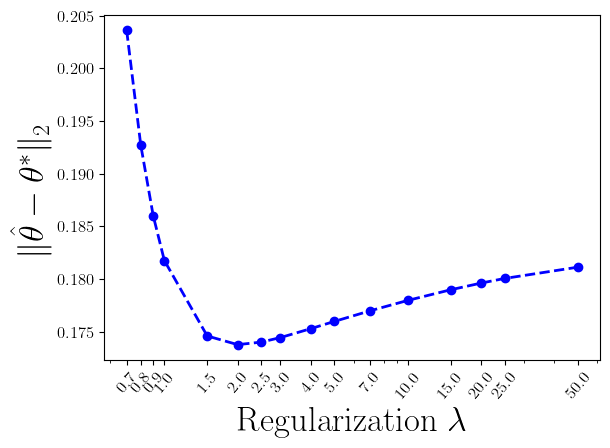

In [7]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.xscale('log')
plt.rc('text', usetex=True)
ind = 11
plt.xlabel(r'Regularization $\lambda$')
plt.ylabel(r'$ \lVert \hat{\theta} - \theta^* \rVert_2$')
plt.xticks(df['lamb'][ind:], df['lamb'][ind:], rotation=50)
plt.tight_layout()
plt.plot(df['lamb'][ind:], df['t1_thetadiff_oa_mean'][ind:], '--bo')

plt.savefig("syn-thetadiff.pdf", format='pdf')

## Comparison to Standard dp
- Unregularized loss
- Regularized loss

[0.1] [0.5] [1.]
[50000] [30]


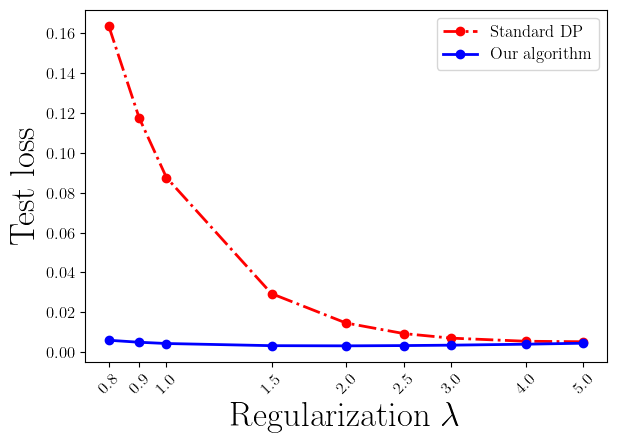

In [6]:
# Unregularized/Type 1 loss

print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

ind = 12
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:], df['lamb'][ind:], rotation=45)
plt.tight_layout()

plt.plot(df['lamb'][ind:], df['t1_sdp_test_mean'][ind:], '-.ro', label="Standard DP")
plt.plot(df['lamb'][ind:], df['t1_oa_test_mean'][ind:], '-bo', label="Our algorithm")
plt.legend()

plt.savefig("syn-t1-our_vs_sdp.pdf", format='pdf')

[0.1] [0.5] [1.]
[50000] [30]


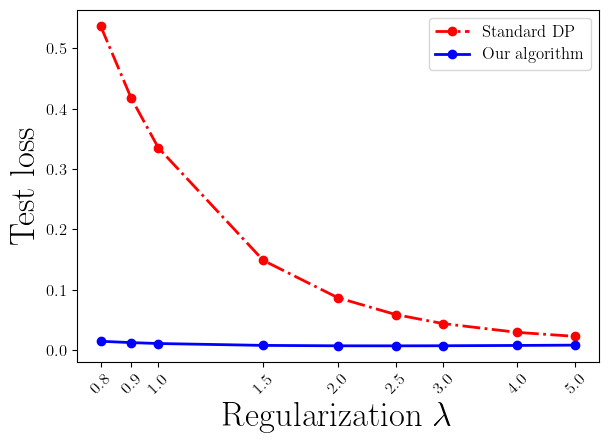

In [7]:
# Regularized/Type 2 loss

print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

ind = 12
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:], df['lamb'][ind:], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:], df['t2_sdp_test_mean'][ind:], '-.ro', label="Standard DP")
plt.plot(df['lamb'][ind:], df['t2_oa_test_mean'][ind:], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("syn-t2-our_vs_sdp.pdf", format='pdf')

## Comparison to  jorgensen
- Unregularized loss
- Regularized loss

[0.1] [0.5] [1.]
[50000] [30]


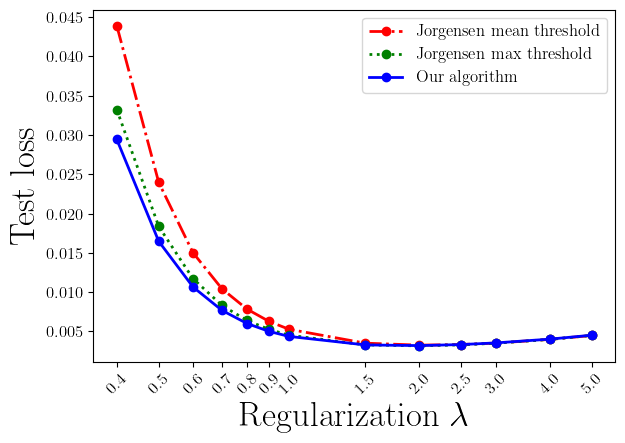

In [8]:
# Unregularized/Type 1 loss
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())
ind = 8

plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:], df['lamb'][ind:], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:], df['t1_jorgavg_test_mean'][ind:], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:], df['t1_jorgmax_test_mean'][ind:], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:], df['t1_oa_test_mean'][ind:], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("syn-t1-our_vs_jorg.pdf", format='pdf')

[0.1] [0.5] [1.]
[50000] [30]


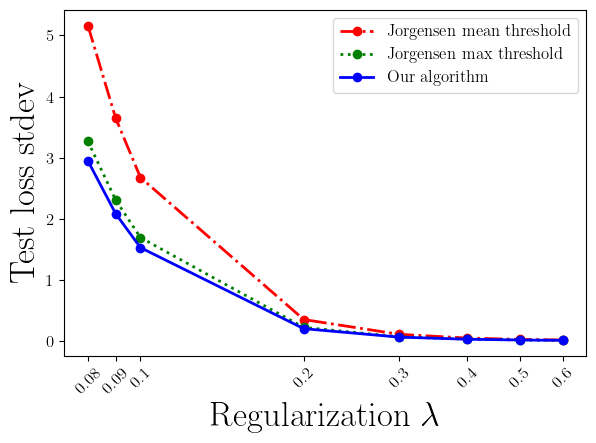

In [9]:
# Unregularized/Type 1 LOSS STD
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())
ind, end = 3,11
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss stdev')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:end], df['t1_jorgavg_test_std'][ind:end], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:end], df['t1_jorgmax_test_std'][ind:end], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:end], df['t1_oa_test_std'][ind:end], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("syn-t1-our_vs_jorg_std.pdf", format='pdf')

[0.1] [0.5] [1.]
[50000] [30]


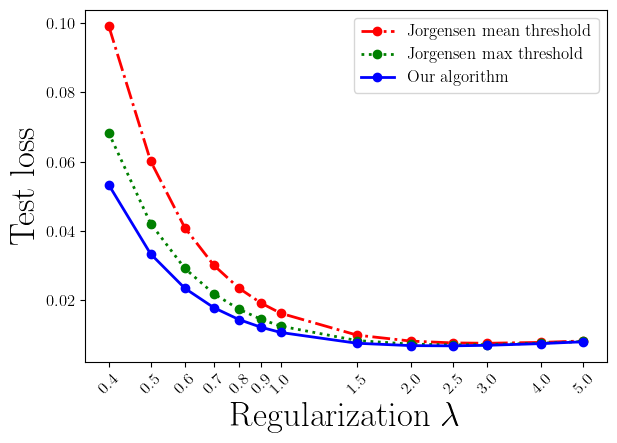

In [10]:
# Regularized/Type 2 LOSS
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())
ind = 8
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:], df['lamb'][ind:], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:], df['t2_jorgavg_test_mean'][ind:], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:], df['t2_jorgmax_test_mean'][ind:], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:], df['t2_oa_test_mean'][ind:],'-bo', label="Our algorithm")
plt.legend()
plt.savefig("syn-t2-our_vs_jorg.pdf", format='pdf')

[0.1] [0.5] [1.]
[50000] [30]


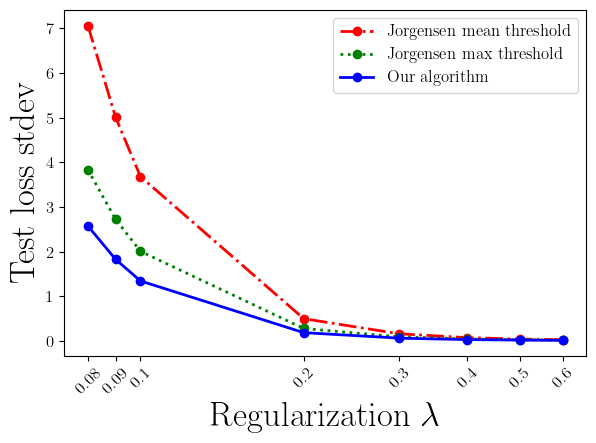

In [11]:
# Regularized/Type 2 LOSS STD
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())
ind = 3
end = 11

plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss stdev')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:end], df['t2_jorgavg_test_std'][ind:end], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:end], df['t2_jorgmax_test_std'][ind:end], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:end], df['t2_oa_test_std'][ind:end], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("syn-t2-our_vs_jorg_std.pdf", format='pdf')

# Real dataset

In [12]:
df = pd.read_pickle("lambda-var-real.pkl")

## Comparison to Standard dp
- Unregularized loss
- Regularized loss

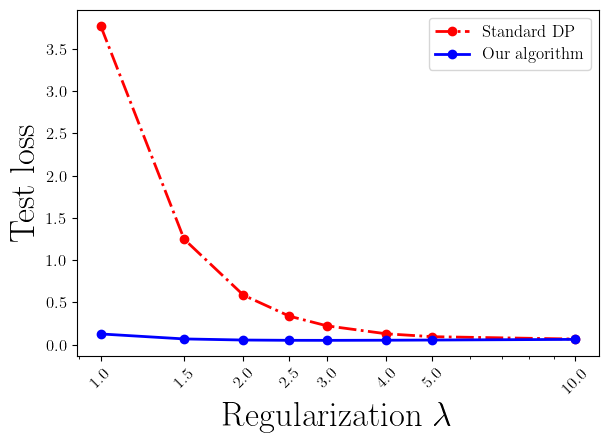

In [13]:
# Unregularized/Type 1 loss
ind = 18
end = 26
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)
plt.tight_layout()

plt.plot(df['lamb'][ind:end], df['t1_sdp_test_mean'][ind:end], '-.ro', label="Standard DP")
plt.plot(df['lamb'][ind:end], df['t1_oa_test_mean'][ind:end], '-bo', label="Our algorithm")
plt.legend()

plt.savefig("medcost-t1-our_vs_sdp.pdf", format='pdf')

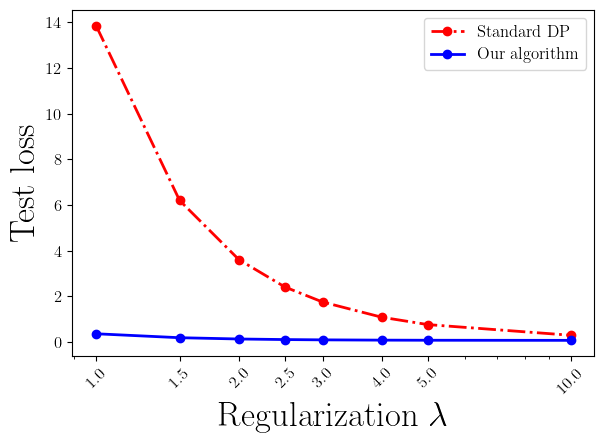

In [14]:
# Regularized/Type 2 loss

ind = 18
end = 26
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:end], df['t2_sdp_test_mean'][ind:end], '-.ro', label="Standard DP")
plt.plot(df['lamb'][ind:end], df['t2_oa_test_mean'][ind:end], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("medcost-t2-our_vs_sdp.pdf", format='pdf')

## Comparison to  jorgensen
- Unregularized loss
- Regularized loss

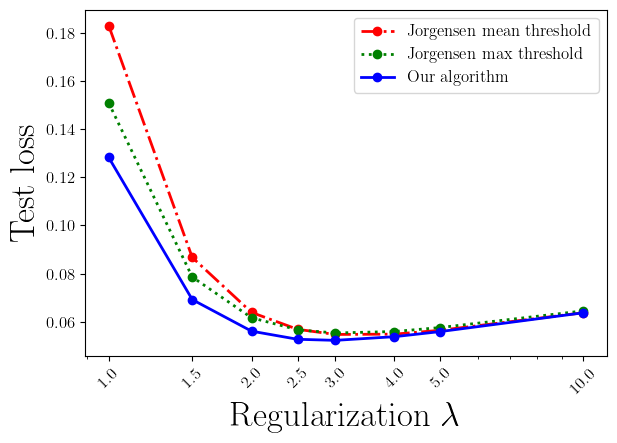

In [15]:
# Unregularized/Type 1 loss
ind = 18
end = 26
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:end], df['t1_jorgavg_test_mean'][ind:end], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:end], df['t1_jorgmax_test_mean'][ind:end], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:end], df['t1_oa_test_mean'][ind:end], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("medcost-t1-our_vs_jorg.pdf", format='pdf')

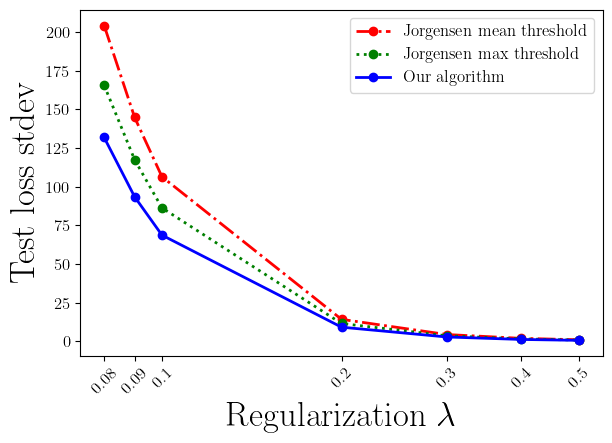

In [16]:
# Unregularized/Type 1 LOSS STD
ind = 7
end = 14
plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss stdev')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:end], df['t1_jorgavg_test_std'][ind:end], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:end], df['t1_jorgmax_test_std'][ind:end], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:end], df['t1_oa_test_std'][ind:end], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("medcost-t1-our_vs_jorg_std.pdf", format='pdf')

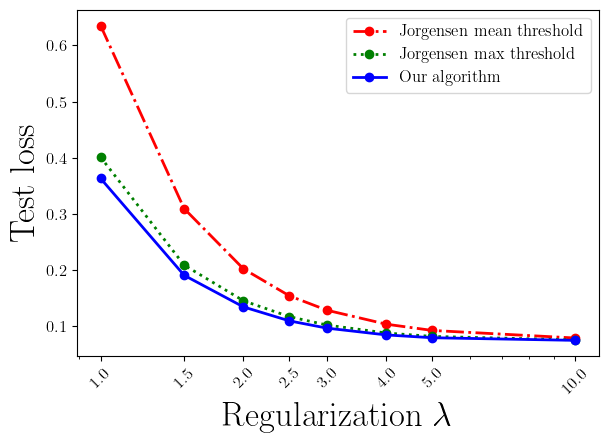

In [17]:
# Regularized/Type 2 LOSS
ind = 18
end = 26

plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:end], df['t2_jorgavg_test_mean'][ind:end], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:end], df['t2_jorgmax_test_mean'][ind:end], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:end], df['t2_oa_test_mean'][ind:end], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("medcost-t2-our_vs_jorg.pdf", format='pdf')

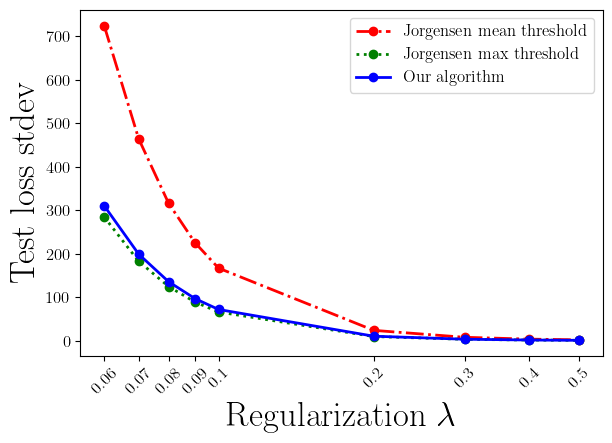

In [18]:
# Regularized/Type 2 LOSS STD
ind = 5
end = 14

plt.xscale('log')
plt.xlabel(f'Regularization $\lambda$')
plt.ylabel('Test loss stdev')
plt.xticks(df['lamb'][ind:end], df['lamb'][ind:end], rotation=45)

plt.tight_layout()
plt.plot(df['lamb'][ind:end], df['t2_jorgavg_test_std'][ind:end], '-.ro', label="Jorgensen mean threshold")
plt.plot(df['lamb'][ind:end], df['t2_jorgmax_test_std'][ind:end], ':go', label="Jorgensen max threshold")
plt.plot(df['lamb'][ind:end], df['t2_oa_test_std'][ind:end], '-bo', label="Our algorithm")
plt.legend()
plt.savefig("medcost-t2-our_vs_jorg_std.pdf", format='pdf')